In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')    # reading the csv file
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [6]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('./images/'+train['Id'][i]+'.jpg',target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:31<00:00, 229.26it/s]


In [7]:
X.shape

(7254, 200, 200, 3)

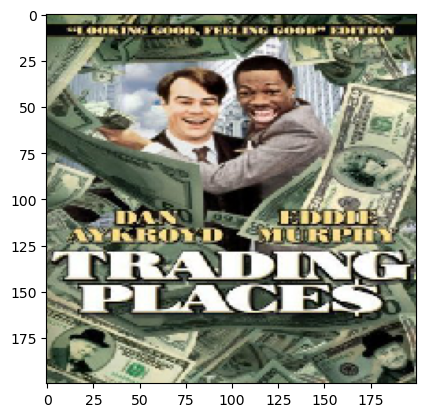

In [8]:
plt.imshow(X[2])

In [9]:
train['Genre'][2]

"['Comedy']"

In [10]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [13]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 16)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 98, 98, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 47, 47, 32)       

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
102/102 [==============================] - 352s 3s/step - loss: 0.3842 - accuracy: 0.1605 - val_loss: 0.2759 - val_accuracy: 0.1970
Epoch 2/10
102/102 [==============================] - 331s 3s/step - loss: 0.2822 - accuracy: 0.2143 - val_loss: 0.2504 - val_accuracy: 0.1970
Epoch 3/10
102/102 [==============================] - 337s 3s/step - loss: 0.2670 - accuracy: 0.2134 - val_loss: 0.2426 - val_accuracy: 0.1970
Epoch 4/10
102/102 [==============================] - 339s 3s/step - loss: 0.2604 - accuracy: 0.2206 - val_loss: 0.2486 - val_accuracy: 0.1970
Epoch 5/10
102/102 [==============================] - 320s 3s/step - loss: 0.2557 - accuracy: 0.2292 - val_loss: 0.2435 - val_accuracy: 0.1970
Epoch 6/10
  9/102 [=>............................] - ETA: 5:17 - loss: 0.2514 - accuracy: 0.2431

KeyboardInterrupt: 